## NBA Hackathon 2019 Notebook 
Import extraction and working libraries
Import date functions 

Find Top 10 players on ESPN<br>
Find all player handles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from datetime import datetime 
warnings.filterwarnings("ignore")
import pandas_profiling


In [2]:
# Check working directory
!ls

Alltags.csv            NBA_backup.ipynb copy  dfhash_tags.csv
GetPlayerHandles.ipynb NbaEman.ipynb          holdout_set.csv
NBA.ipynb              Sorthashtags.ipynb     player_handles.csv
NBATag_Categories.csv  Team_Slogans.csv       playernames.csv
NBATeam_handles.csv    Untitled.ipynb         training_set.csv
NBATeam_tag.csv        combined.csv           tweet_activity.csv
NBATraing.csv          combined.xlsx
NBA_Handles.csv        df_tags.csv


In [3]:
dfhold = pd.read_csv("holdout.csv",header=0,encoding = 'unicode_escape')


FileNotFoundError: [Errno 2] File b'holdout.csv' does not exist: b'holdout.csv'

In [ ]:
dfhold

In [4]:
#import training dataset
df = pd.read_csv("training_set.csv",header=0,encoding = 'unicode_escape')
df.head(13)



,Engagements,Followers at Posting,Created,Type,Description
0,502093,36984682,2019-05-21 23:30:51 EDT,Video,The @raptors bench trio of @sergeibaka @norman...
1,603380,36984682,2019-05-21 22:53:33 EDT,Video,@kyle_lowry7 pulls from deep for the @raptors ...
2,603380,36984682,2019-05-21 22:19:58 EDT,Video,@k_mid22 with some english on the @bucks dime!
3,725100,36984682,2019-05-21 22:02:41 EDT,Video,Kawhi punches it home with the left on TNT!
4,661446,36984682,2019-05-21 20:47:49 EDT,Video,@giannis_an34 goes baseline early to rock the ...
5,322444,36955156,2019-05-21 14:02:32 EDT,Photo,Congrats to the 2018-19 NBA All-Rookie First T...
6,722540,36955156,2019-05-21 12:30:53 EDT,Video,The @warriors locked in for four games to adva...
7,339265,36955156,2019-05-21 08:59:02 EDT,Photo,Will the @bucks take a commanding 3-1 lead... ...
8,443330,36955156,2019-05-21 00:48:16 EDT,Photo,TAP to SHOP the @warriors Western Conference C...
9,652193,36955156,2019-05-21 00:38:18 EDT,Video,Hey @stephencurry30... that was the first time...


In [5]:
#check if all the data was imported correctly 

df.shape

(7766, 5)

In [6]:
df.describe()*1000

,Engagements,Followers at Posting
count,7.766000e+06,7.766000e+06
mean,5.923129e+08,3.042770e+10
std,1.792682e+08,3.748957e+09
min,1.278160e+08,2.487554e+10
25%,4.173900e+08,2.698910e+10
50%,6.397285e+08,3.004747e+10
75%,7.216282e+08,3.392854e+10
max,1.129585e+09,3.698468e+10


In [7]:
# check if there is any NaN values
df.isna().sum()

Engagements              0
Followers at Posting     0
Created                  0
Type                     0
Description             14
dtype: int64

In [8]:
#  Do the Pandas Profiling 
pandas_profiling.ProfileReport(df)


Number of variables,5
Number of observations,7766
Total Missing (%),0.0%
Total size in memory,303.4 KiB
Average record size in memory,40.0 B
Numeric,2
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [9]:
# show empty Description rows and created a seperate datset for any, but can also set it up for single columns 

df_no_Description = df[pd.isnull(df).any(axis=1)]
df_no_Description.head()

,Engagements,Followers at Posting,Created,Type,Description
781,728384,35727113,2019-03-31 15:12:18 EDT,Video,NaN
808,393487,35692163,2019-03-29 04:30:09 EDT,Photo,NaN
1031,755787,35393121,2019-03-15 01:03:25 EDT,Video,NaN
1744,763284,34300664,2019-01-29 23:34:34 EST,Video,NaN
4860,683799,27859939,2018-04-30 16:45:42 EDT,Video,NaN


In [10]:
#Drop only if NaN in specific column ... in this case the Decription column - View only 
df.dropna(subset=['Description']) #Drop only if NaN in specific column (as asked in the question)

,Engagements,Followers at Posting,Created,Type,Description
0,502093,36984682,2019-05-21 23:30:51 EDT,Video,The @raptors bench trio of @sergeibaka @norman...
1,603380,36984682,2019-05-21 22:53:33 EDT,Video,@kyle_lowry7 pulls from deep for the @raptors ...
2,603380,36984682,2019-05-21 22:19:58 EDT,Video,@k_mid22 with some english on the @bucks dime!
3,725100,36984682,2019-05-21 22:02:41 EDT,Video,Kawhi punches it home with the left on TNT!
4,661446,36984682,2019-05-21 20:47:49 EDT,Video,@giannis_an34 goes baseline early to rock the ...
5,322444,36955156,2019-05-21 14:02:32 EDT,Photo,Congrats to the 2018-19 NBA All-Rookie First T...
6,722540,36955156,2019-05-21 12:30:53 EDT,Video,The @warriors locked in for four games to adva...
7,339265,36955156,2019-05-21 08:59:02 EDT,Photo,Will the @bucks take a commanding 3-1 lead... ...
8,443330,36955156,2019-05-21 00:48:16 EDT,Photo,TAP to SHOP the @warriors Western Conference C...
9,652193,36955156,2019-05-21 00:38:18 EDT,Video,Hey @stephencurry30... that was the first time...


In [11]:
#Drop only if NaN in specific column ... in this case the Decription column - IN PLACE  only 
df.dropna(subset=['Description'], inplace = True) #Drop only if NaN in specific column 

In [12]:
df.shape

(7752, 5)

In [13]:
df.Created = df.Created.astype(str)


In [14]:
#split Created column to three columns (Date, time, TimeZone)
df[['NBADate','NBATime','NBATimeZone']] = df['Created'].str.split(' ',expand=True)
df['NBADate'] = df['NBADate'].astype('datetime64[ns]')
df.head()

,Engagements,Followers at Posting,Created,Type,Description,NBADate,NBATime,NBATimeZone
0,502093,36984682,2019-05-21 23:30:51 EDT,Video,The @raptors bench trio of @sergeibaka @norman...,2019-05-21,23:30:51,EDT
1,603380,36984682,2019-05-21 22:53:33 EDT,Video,@kyle_lowry7 pulls from deep for the @raptors ...,2019-05-21,22:53:33,EDT
2,603380,36984682,2019-05-21 22:19:58 EDT,Video,@k_mid22 with some english on the @bucks dime!,2019-05-21,22:19:58,EDT
3,725100,36984682,2019-05-21 22:02:41 EDT,Video,Kawhi punches it home with the left on TNT!,2019-05-21,22:02:41,EDT
4,661446,36984682,2019-05-21 20:47:49 EDT,Video,@giannis_an34 goes baseline early to rock the ...,2019-05-21,20:47:49,EDT


In [15]:
df['Created'].head(5)


0    2019-05-21 23:30:51 EDT
1    2019-05-21 22:53:33 EDT
2    2019-05-21 22:19:58 EDT
3    2019-05-21 22:02:41 EDT
4    2019-05-21 20:47:49 EDT
Name: Created, dtype: object

In [16]:
# texttosplit = "2019-05-21 20:47:49 EDT"
# sep = ' '
# rest = texttosplit.split(sep, 1)[0]
# rest
# rest1 = texttosplit.split(sep, 1)[-1]

# # Get the Timezone EDT  in format %Z
# texttosplit.split(sep, -1)[2]

# # Get the time in format %H:%M:%S 
# texttosplit.split(sep, -1)[1]

# # Get the date in format %Y-%m-%d 
# texttosplit.split(sep, -1)[0]

# format='%Y-%m-%d %H:%M:%S %Z')

df['MBAYear'] = df.NBADate.apply(lambda x: pd.to_datetime(x).strftime('%Y'))
df['MBAMonth'] = df.NBADate.apply(lambda x: pd.to_datetime(x).strftime('%m'))
df['NBADay'] = df.NBADate.apply(lambda x: pd.to_datetime(x).strftime('%d'))

df['NBAHour'] = df.NBATime.apply(lambda x: pd.to_datetime(x).strftime('%H'))
df['NBAMin'] = df.NBATime.apply(lambda x: pd.to_datetime(x).strftime('%M'))
df['NBASec'] = df.NBATime.apply(lambda x: pd.to_datetime(x).strftime('%S'))

df['Weekday'] = df.NBADate.apply(lambda x: pd.to_datetime(x).strftime('%w'))
df['Weekofyear'] = df.NBADate.apply(lambda x: pd.to_datetime(x).strftime('%U'))



In [17]:
df.head(5)

,Engagements,Followers at Posting,Created,Type,Description,NBADate,NBATime,NBATimeZone,MBAYear,MBAMonth,NBADay,NBAHour,NBAMin,NBASec,Weekday,Weekofyear
0,502093,36984682,2019-05-21 23:30:51 EDT,Video,The @raptors bench trio of @sergeibaka @norman...,2019-05-21,23:30:51,EDT,2019,05,21,23,30,51,2,20
1,603380,36984682,2019-05-21 22:53:33 EDT,Video,@kyle_lowry7 pulls from deep for the @raptors ...,2019-05-21,22:53:33,EDT,2019,05,21,22,53,33,2,20
2,603380,36984682,2019-05-21 22:19:58 EDT,Video,@k_mid22 with some english on the @bucks dime!,2019-05-21,22:19:58,EDT,2019,05,21,22,19,58,2,20
3,725100,36984682,2019-05-21 22:02:41 EDT,Video,Kawhi punches it home with the left on TNT!,2019-05-21,22:02:41,EDT,2019,05,21,22,02,41,2,20
4,661446,36984682,2019-05-21 20:47:49 EDT,Video,@giannis_an34 goes baseline early to rock the ...,2019-05-21,20:47:49,EDT,2019,05,21,20,47,49,2,20


In [18]:
df.to_csv (r'NBATraing.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path


#### Lets start plotting 

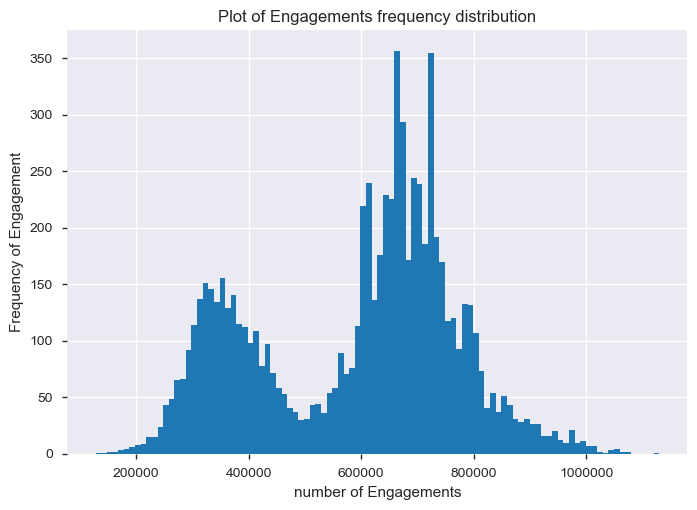

In [19]:
#  Plot the Engagements distribution

import matplotlib.pyplot as plt 
plt.figure()
plt.hist(df['Engagements'], bins=100)
plt.xlabel('number of Engagements')
plt.ylabel('Frequency of Engagement')
plt.title('Plot of Engagements frequency distribution')
plt.show()


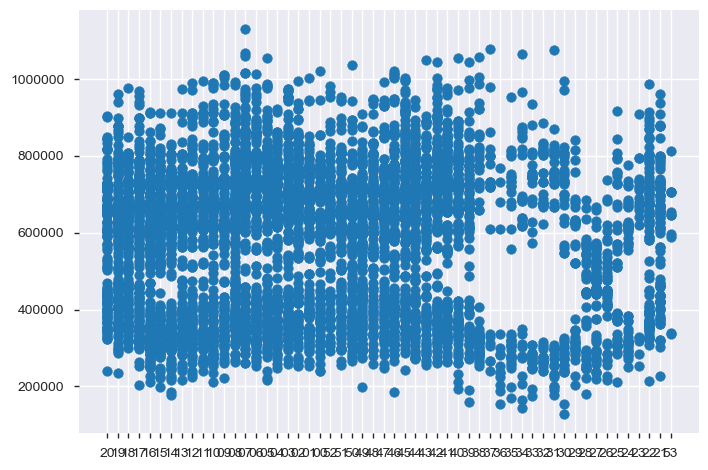

In [20]:
#  Plot the Engagements by Week of Year

import matplotlib.pyplot as plt 
plt.figure()
plt.scatter( df['Weekofyear'],df['Engagements'])
plt.show()

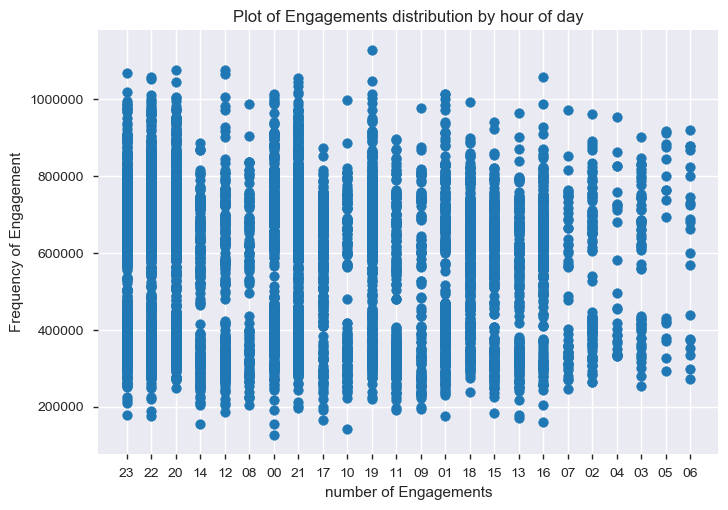

In [21]:
#  Plot the Engagements by Hour of day

import matplotlib.pyplot as plt 
plt.figure()
plt.scatter( df['NBAHour'],df['Engagements'])
plt.xlabel('number of Engagements')
plt.ylabel('Frequency of Engagement')
plt.title('Plot of Engagements distribution by hour of day')
plt.show()

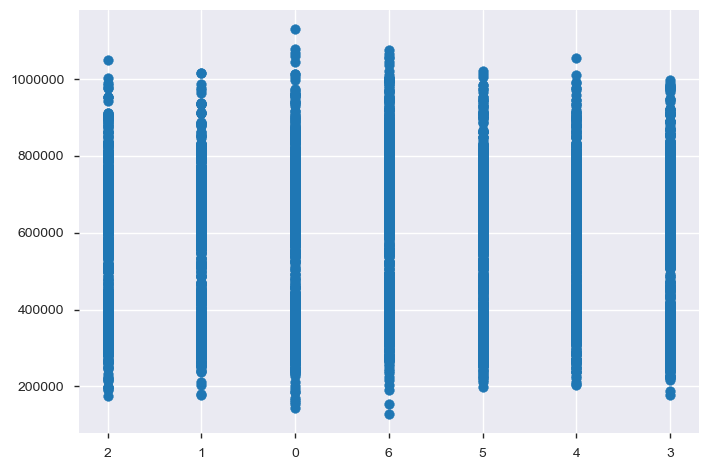

In [22]:
#  Plotting the category "State" and the number of FIPS per State. 

import matplotlib.pyplot as plt 
plt.figure()
plt.scatter( df['Weekday'],df['Engagements'])
plt.show()

## Set up the NBA date ranges 
Regular season , Playffs, Playoff Finals and offseason


### Offseason - June 13, 2017 - October 16, 2017

### Regular season  - October 17, 2017 – April 11, 2018

### Playoffs - April 14 – May 28, 2018
### Finals - May 31 – June 8, 2018 

### Offseason - June 9, 2018 - October 15, 2018

### Regular - October 16, 2018 – April 10, 2019

### Playoffs - April 13 – May 25, 2019 
### Finals  - May 30 – June 13, 2019 

In [32]:
import datetime

Offseason_Start18 = datetime.datetime.strptime("13-06-2017", "%d-%m-%Y")
Offseason_End18  = datetime.datetime.strptime("16-10-2017", "%d-%m-%Y")

Regular_Start18 = datetime.datetime.strptime("17-10-2017", "%d-%m-%Y")
Regular_End18 = datetime.datetime.strptime("13-04-2018", "%d-%m-%Y")

Playoffs_Start18 = datetime.datetime.strptime("14-04-2018", "%d-%m-%Y")
Playoffs_End18  = datetime.datetime.strptime("30-05-2018", "%d-%m-%Y")

Finals_Start18 = datetime.datetime.strptime("31-05-2018", "%d-%m-%Y")
Finals_End18  = datetime.datetime.strptime("08-06-2018", "%d-%m-%Y")

Offseason_Start19 = datetime.datetime.strptime("09-06-2018", "%d-%m-%Y")
Offseason_End19  = datetime.datetime.strptime("15-10-2018", "%d-%m-%Y")

Regular_Start19 = datetime.datetime.strptime("16-10-2018", "%d-%m-%Y")
Regular_End19 = datetime.datetime.strptime("12-04-2019", "%d-%m-%Y")

Playoffs_Start19 = datetime.datetime.strptime("13-04-2019", "%d-%m-%Y")
Playoffs_End19  = datetime.datetime.strptime("29-05-2019", "%d-%m-%Y")

Finals_Start19 = datetime.datetime.strptime("30-05-2019", "%d-%m-%Y")
Finals_End19  = datetime.datetime.strptime("13-06-2019", "%d-%m-%Y")

TODAY_CHECK = datetime.datetime.strptime("18-10-2017","%d-%m-%Y")

### Allocate each Created date to a range regular season, playoffs, finals or offseason

In [33]:
# insert the date for checking here 

checkdate =  "08-06-2019"      
checkdate =  datetime.datetime.strptime(f'{CHECK_DATE}', "%d-%m-%Y")
Season = CheckNBASeason(checkdate)
print (Season)

NameError: name 'CHECK_DATE' is not defined

In [40]:

# Need to use below to run on each row of daatframe and write to relevant column 
# Maybe set as a function
def CheckNBASeason(checkdate):
    if Offseason_Start18  <= checkdate <= Offseason_End18:
#         print ("Offseason")
        NBASeason = "Offseason"   
    elif Regular_Start18 <= checkdate <= Regular_End18:
#        print ("RegSeason")
        NBASeason = "RegSeason"
    elif Playoffs_Start18  <= checkdate <= Playoffs_End18:
#         print ("Playoffs")
        NBASeason = "Playoffs"
    elif Finals_Start18  <= checkdate <= Finals_End18:
#         print ("Finals")
        NBASeason = "Finals"
    elif Offseason_Start19  <= checkdate <= Offseason_End19:
#         print ("Offseason")
        NBASeason = "Offseason"
    elif Regular_Start19 <= checkdate <= Regular_End19:
#         print ("RegSeason")
        NBASeason = "RegSeason"
    elif Playoffs_Start19  <= checkdate <= Playoffs_End19:
#         print ("Playoffs")
        NBASeason = "Playoffs"
    elif Finals_Start19  <= checkdate <= Finals_End19:
#         print ("Finals")
        NBASeason = "Finals"
    else:
#         print ("Outofrange")
        NBASeason = "ErrorRange"    
#     
    return NBASeason

In [41]:
# Update dataframe with relevant Basketball season component 

df['Season'] = df.NBADate.apply (lambda x: CheckNBASeason(x))

In [42]:
df.head(5)

,Engagements,Followers at Posting,Created,Type,Description,NBADate,NBATime,NBATimeZone,MBAYear,MBAMonth,NBADay,NBAHour,NBAMin,NBASec,Weekday,Weekofyear,Season
0,502093,36984682,2019-05-21 23:30:51 EDT,Video,The @raptors bench trio of @sergeibaka @norman...,2019-05-21,23:30:51,EDT,2019,05,21,23,30,51,2,20,Playoffs
1,603380,36984682,2019-05-21 22:53:33 EDT,Video,@kyle_lowry7 pulls from deep for the @raptors ...,2019-05-21,22:53:33,EDT,2019,05,21,22,53,33,2,20,Playoffs
2,603380,36984682,2019-05-21 22:19:58 EDT,Video,@k_mid22 with some english on the @bucks dime!,2019-05-21,22:19:58,EDT,2019,05,21,22,19,58,2,20,Playoffs
3,725100,36984682,2019-05-21 22:02:41 EDT,Video,Kawhi punches it home with the left on TNT!,2019-05-21,22:02:41,EDT,2019,05,21,22,02,41,2,20,Playoffs
4,661446,36984682,2019-05-21 20:47:49 EDT,Video,@giannis_an34 goes baseline early to rock the ...,2019-05-21,20:47:49,EDT,2019,05,21,20,47,49,2,20,Playoffs


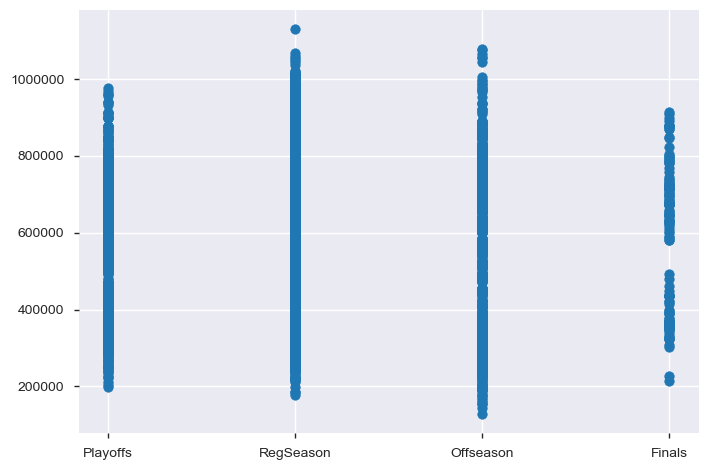

In [43]:

import matplotlib.pyplot as plt 
plt.figure()
plt.scatter( df['Season'],df['Engagements'])
plt.show()

In [44]:

df[df.Season == "ErrorRange"]

,Engagements,Followers at Posting,Created,Type,Description,NBADate,NBATime,NBATimeZone,MBAYear,MBAMonth,NBADay,NBAHour,NBAMin,NBASec,Weekday,Weekofyear,Season


In [45]:
df_no_Description.head()

,Engagements,Followers at Posting,Created,Type,Description
781,728384,35727113,2019-03-31 15:12:18 EDT,Video,NaN
808,393487,35692163,2019-03-29 04:30:09 EDT,Photo,NaN
1031,755787,35393121,2019-03-15 01:03:25 EDT,Video,NaN
1744,763284,34300664,2019-01-29 23:34:34 EST,Video,NaN
4860,683799,27859939,2018-04-30 16:45:42 EDT,Video,NaN


In [46]:
# practise adding empty columns 

df.shape

# Set up the column header names on training set
# Hash_column_header_list = ['HTop10','H1120','H2130', 'H30plus']

(7752, 17)

### Additonal Column descriptions to extend the dataset for tag frequency

Evaluating the most used hashtags (starting with "#") and tags starting with "@" in the Decriptions<br>

['HTop10'] = Hashtags found Top 10 frequency <br>
['H1120'] = Hashtags found frequency at 11th - 20th highest freequency<br>
['H2130'] = Hashtags found frequency at 21st - 30th highest freequency<br>
['H30plus'] = Hashtags found frequency all other lower frequncy counts <br>


['Top10'] = The top 10 @ Tags most frquently found in the dataset  <br>
['T2130'] = Tags found frequency at 21st - 30th highest freequency<br>
['T3140'] = Tags found frequency at 31st - 40th highest freequency<br>
['T4150'] = Tags found frequency at 41st - 50th highest freequency<br>
['T5160'] = Tags found frequency at 51st - 60th highest freequency<br>
['T60plus'] = Tags found frequency atat 61st and lower frequencies <br>


In [47]:
df['HTop10'] = 0
df['H1120'] = 0
df['H2130'] = 0
df['H30plus'] = 0
df['Top10'] = 0
df['T1120'] = 0
df['T2130'] = 0
df['T3140'] = 0
df['T4150'] = 0
df['T5160'] = 0
df['T60plus'] = 0

# Check the stat of the additional columns should all be initialized as zero
df.columns

Index(['Engagements', 'Followers at Posting', 'Created', 'Type', 'Description',
       'NBADate', 'NBATime', 'NBATimeZone', 'MBAYear', 'MBAMonth', 'NBADay',
       'NBAHour', 'NBAMin', 'NBASec', 'Weekday', 'Weekofyear', 'Season',
       'HTop10', 'H1120', 'H2130', 'H30plus', 'Top10', 'T1120', 'T2130',
       'T3140', 'T4150', 'T5160', 'T60plus'],
      dtype='object')

In [48]:
df.head()

,Engagements,Followers at Posting,Created,Type,Description,NBADate,NBATime,NBATimeZone,MBAYear,MBAMonth,...,H1120,H2130,H30plus,Top10,T1120,T2130,T3140,T4150,T5160,T60plus
0,502093,36984682,2019-05-21 23:30:51 EDT,Video,The @raptors bench trio of @sergeibaka @norman...,2019-05-21,23:30:51,EDT,2019,05,...,0,0,0,0,0,0,0,0,0,0
1,603380,36984682,2019-05-21 22:53:33 EDT,Video,@kyle_lowry7 pulls from deep for the @raptors ...,2019-05-21,22:53:33,EDT,2019,05,...,0,0,0,0,0,0,0,0,0,0
2,603380,36984682,2019-05-21 22:19:58 EDT,Video,@k_mid22 with some english on the @bucks dime!,2019-05-21,22:19:58,EDT,2019,05,...,0,0,0,0,0,0,0,0,0,0
3,725100,36984682,2019-05-21 22:02:41 EDT,Video,Kawhi punches it home with the left on TNT!,2019-05-21,22:02:41,EDT,2019,05,...,0,0,0,0,0,0,0,0,0,0
4,661446,36984682,2019-05-21 20:47:49 EDT,Video,@giannis_an34 goes baseline early to rock the ...,2019-05-21,20:47:49,EDT,2019,05,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# a = [1,1,1,1,2,2,2,2,3,3,3,4,4]

# d = {}
# for item in a:
#     if item in d:
#         d[item] = d.get(item)+1
#     else:
#         d[item] = 1

# for k,v in d.items():
#     print(str(k)+':'+str(v))

In [50]:
# there are up to 7 columns of tags 
dftags = pd.read_csv("df_tags.csv")


In [34]:
dftags['0'].nunique()

150

In [51]:
dftags['0']

0              @raptors
1          @kyle_lowry7
2              @k_mid22
3                   NaN
4         @giannis_an34
5           @lukadoncic
6             @warriors
7                @bucks
8             @warriors
9       @stephencurry30
10      @stephencurry30
11            @warriors
12        @money23green
13            @warriors
14        @money23green
15      @stephencurry30
16     @meyersleonard11
17        @money23green
18      @stephencurry30
19      @stephencurry30
20       @damianlillard
21     @meyersleonard11
22      @stephencurry30
23        @money23green
24        @budweiserusa
25        @money23green
26        @trailblazers
27             @raptors
28             @raptors
29             @raptors
             ...       
751         @jmglitxh27
752         @russwest44
753         @rajonrondo
754            @ygtrece
755                 NaN
756           @nbaontnt
757                 NaN
758                 NaN
759                 NaN
760                 NaN
761           @j

In [46]:
dftags['0'].value_counts()

@raptors                  35
@damianlillard            32
@warriors                 30
@stephencurry30           29
@giannis_an34             25
@bucks                    23
@sixers                   20
@trailblazers             19
@nuggets                  19
@houstonrockets           18
@nbaontnt                 17
@jmglitxh27               17
@easymoneysniper          15
@jharden13                15
@russwest44               15
@money23green             15
@celtics                  14
@kyrieirving              12
@swish41                  11
@joelembiid               10
@cp3                      10
@3jmccollum                9
@dwyanewade                9
@bensimmons                9
@klaythompson              7
@brooklynnets              7
@spidadmitchell            6
@kyle_lowry7               6
@pskills43                 6
@dwhite921                 6
                          ..
@spiceadams                1
@leaninorg                 1
@khembirch                 1
@jonisaac_01  

ValueError: `bins` must increase monotonically, when an array

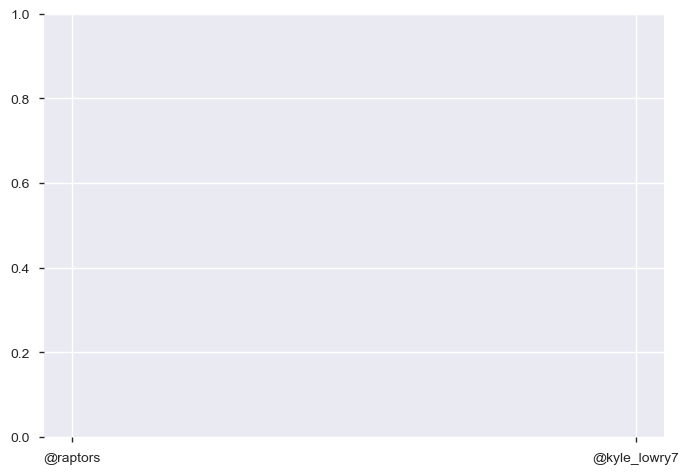

In [50]:
# Visualize correlations with the y variable with a graph
plt.figure()
plt.bar(dftags['0'], dftags['0'].value_counts())
plt.show()

In [31]:
!ls NBA*

NBA.ipynb             NBATraing.csv         NBA_backup.ipynb copy
NBATag_Categories.csv NBA_Handles.csv


In [ ]:
df.head(40)

In [40]:
import re

#gets the # of '@'
text = "@kyle_lowry7 pulls from deep for the @raptors"  
result = re.findall(r"\@+", text)  
print(result)

#gets the  handels of '@'
text = "@kyle_lowry7 pulls from deep for the @raptors"  
result = re.findall("[@]\w+", text)
print(result)

['@', '@']
['@kyle_lowry7', '@raptors']


In [41]:
Disc = df['Description'].values
Disc

array(['The @raptors bench trio of @sergeibaka @normanpowell4 & @fredvanvleet combine for 48 in Game 4!',
       '@kyle_lowry7 pulls from deep for the @raptors in the 4th on TNT!',
       '@k_mid22 with some english on the @bucks dime!', ...,
       'It\x92s OCTOBER and ?? is back! \n#NBAPreseason',
       'The newest @timberwolves.... @jimmybutler, @jeffteague and @tajgibson22 make their #NBAPreseason debut!',
       '@zo puts up 8 assists, 7 rebounds & 5 points in his @lakers #NBAPreseason debut.'],
      dtype=object)

In [42]:
tags = list()
for i in Disc:
    text = i
    result = re.findall(r"\@+", text)  
    print(result)

['@', '@', '@', '@']
['@', '@']
['@', '@']
[]
['@']
['@', '@']
['@']
['@', '@']
['@', '@']
['@', '@']
['@', '@']
['@', '@']
['@', '@']
['@']
['@', '@']
['@', '@', '@']
['@']
['@', '@']
['@']
['@', '@']
['@', '@']
['@', '@']
['@']
['@']
['@', '@', '@', '@']
['@', '@', '@', '@']
['@', '@', '@']
['@']
['@', '@']
['@']
['@']
['@', '@']
[]
['@', '@', '@']
['@', '@']
[]
[]
['@', '@']
['@']
['@', '@']
['@', '@', '@']
['@', '@', '@']
['@']
['@', '@']
['@', '@']
['@', '@']
['@']
['@']
['@']
['@', '@']
['@']
['@', '@']
['@', '@', '@']
['@', '@']
['@', '@', '@', '@']
['@', '@']
[]
['@', '@']
['@', '@']
['@']
['@']
['@']
['@']
['@', '@']
['@', '@', '@', '@']
['@', '@', '@', '@']
['@', '@', '@']
['@']
['@', '@']
['@']
['@', '@']
['@', '@']
['@', '@']
['@', '@', '@']
['@']
['@', '@', '@']
['@']
['@', '@']
['@', '@']
['@']
['@', '@', '@', '@']
['@']
['@', '@', '@']
['@', '@']
['@']
['@', '@']
['@']
['@']
[]
['@']
['@']
['@', '@', '@']
['@']
[]
['@']
['@']
['@', '@']
['@', '@', '@', '@']
['@', '@', '@

['@']
[]
['@']
['@', '@']
[]
[]
['@', '@']
['@', '@']
['@', '@']
['@', '@']
['@', '@']
['@']
['@', '@']
[]
[]
['@']
['@', '@', '@']
['@', '@']
['@', '@']
[]
[]
['@']
['@', '@']
['@']
[]
['@', '@']
[]
[]
['@', '@']
['@']
[]
['@', '@']
['@', '@']
[]
['@']
['@']
['@', '@', '@', '@']
['@', '@']
['@', '@']
['@', '@']
['@', '@']
['@', '@', '@', '@', '@']
[]
['@', '@']
[]
['@', '@', '@', '@']
[]
[]
['@', '@']
['@', '@', '@']
['@', '@', '@']
['@', '@']
[]
['@', '@', '@']
['@', '@']
['@', '@', '@', '@']
['@']
['@', '@', '@']
['@', '@', '@']
['@']
['@', '@']
['@']
['@', '@', '@', '@']
['@', '@']
[]
['@']
['@', '@']
['@', '@']
[]
['@']
['@']
['@', '@']
['@', '@']
['@']
['@']
['@', '@']
[]
['@']
['@', '@']
['@']
['@']
['@', '@']
['@', '@', '@', '@']
['@', '@', '@', '@', '@']
['@']
['@', '@', '@']
['@', '@']
['@']
['@', '@']
['@']
['@']
['@', '@']
['@']
['@', '@']
[]
['@', '@']
[]
['@', '@']
[]
[]
['@']
['@', '@']
['@', '@']
[]
['@', '@', '@']
[]
['@', '@']
['@', '@']
['@', '@']
['@', '@', '@', '@'

[]
['@']
[]
['@']
['@', '@', '@']
['@', '@', '@']
['@']
['@', '@', '@']
['@']
[]
['@']
[]
[]
[]
['@']
['@', '@']
['@', '@']
['@']
['@']
['@']
['@', '@']
['@', '@']
['@', '@']
['@', '@']
['@']
['@']
['@', '@', '@']
['@', '@', '@', '@']
['@', '@']
['@', '@', '@']
['@', '@']
['@']
['@', '@']
['@', '@']
[]
['@', '@']
['@']
[]
['@']
['@']
['@', '@']
['@', '@']
[]
['@']
[]
['@']
['@', '@']
['@', '@']
['@', '@']
['@']
['@', '@']
['@']
[]
['@', '@', '@', '@']
[]
['@']
['@', '@', '@', '@']
['@']
['@']
['@']
['@', '@']
['@']
['@']
['@']
['@', '@', '@']
['@']
['@', '@', '@', '@', '@', '@']
['@']
['@']
['@', '@']
['@']
[]
[]
['@', '@']
['@']
['@', '@']
['@', '@']
[]
['@', '@']
['@']
['@']
[]
['@', '@']
['@', '@']
['@']
['@']
['@', '@', '@', '@']
['@', '@', '@']
['@', '@']
['@', '@']
[]
[]
['@', '@']
['@']
['@', '@', '@']
['@']
['@', '@']
[]
['@', '@', '@', '@', '@']
['@', '@', '@', '@']
['@']
['@', '@', '@', '@', '@', '@']
['@']
['@', '@']
['@']
['@']
['@']
['@']
[]
[]
[]
['@', '@', '@', '@']
['@'

In [43]:
tagnames = list()
for i in Disc:
    text = i
    result = re.findall("[@]\w+", text)
    print(result)

['@raptors', '@sergeibaka', '@normanpowell4', '@fredvanvleet']
['@kyle_lowry7', '@raptors']
['@k_mid22', '@bucks']
[]
['@giannis_an34']
['@lukadoncic', '@traeyoung']
['@warriors']
['@bucks', '@raptors']
['@warriors', '@nbastore']
['@stephencurry30', '@nbahistory']
['@stephencurry30', '@money23green']
['@warriors', '@trailblazers']
['@money23green', '@warriors']
['@warriors']
['@money23green', '@warriors']
['@stephencurry30', '@money23green', '@nbahistory']
['@meyersleonard11']
['@money23green', '@warriors']
['@stephencurry30']
['@stephencurry30', '@warriors']
['@damianlillard', '@trailblazers']
['@meyersleonard11', '@trailblazers']
['@stephencurry30']
['@money23green']
['@budweiserusa', '@trailblazers', '@trailblazers', '@warriors']
['@money23green', '@warriors', '@trailblazers', '@nbaonespn']
['@trailblazers', '@warriors', '@nbaonespn']
['@raptors']
['@raptors', '@kristenledlow']
['@raptors']
['@raptors']
['@raptors', '@bucks']
[]
['@k_mid22', '@bucks', '@raptors']
['@reggiemillertnt'

['@dlamarc33']
['@cp3']
['@leafsquad', '@pacers']
['@dwyanewade']
['@gmb_chum12']
['@russwest44', '@jeramigrant', '@okcthunder']
['@raptors', '@detroitpistons']
['@1tyus']
[]
[]
[]
['@footlocker', '@ygtrece', '@nba2k']
[]
[]
['@jharden13', '@blakegriffin23', '@houstonrockets']
[]
['@russwest44', '@okcthunder']
['@spurs']
['@swish41', '@dallasmavs']
['@ruuufio']
['@karltowns']
['@kingjames', '@lakers']
['@realtristan13', '@kingjames']
['@lakers']
[]
[]
[]
['@ATLHawks', '@NBAHistory']
['@kyle_lowry7', '@raptors']
[]
['@kingjames', '@lakers']
['@giannis_an34']
['@kyrieirving', '@celtics']
['@milesbridges', '@dbacon', '@hornets']
['@kingjames']
['@blakegriffin23']
['@kingjames']
[]
[]
['@kingjames', '@theqarena', '@lakers', '@cavs', '@nbaonespn']
['@kingjames']
['@cavs', '@collinyoungbull']
['@kingjames', '@swayyvo', '@unitedmasters', '@lakers', '@cavs', '@nbaonespn']
['@dwyanewade']
['@dwyanewade', '@miamiheat']
['@greenranger14', '@raptors']
[]
['@nvonleh', '@nyknicks']
['@nikstauskas11'

['@jaytatum0', '@nbaonespn']
['@zo', '@lakers', '@warriors', '@nbaonespn']
['@stephencurry30']
['@houstonrockets']
['@russwest44', '@nbahistory', '@gallo_locknez']
['@stephencurry30', '@warriors']
['@russwest44']
[]
['@isaiahthomas', '@lakers']
['@kingjames', '@cavs']
['@kingjames']
['@kingjames', '@kkorv26']
['@spidadmitchell']
['@kingjames']
['@zo', '@lakers']
['@desmith4']
['@russwest44', '@okcthunder', '@NBAHistory']
['@bensimmons']
['@vicoladipo', '@pacers']
['@tomasatoransky', '@ottodayporter22']
['@dloading']
['@kellyoubrejr']
['@StJude', '@nbacares']
['@houstonrockets', '@okcthunder', '@bucks', '@trailblazers']
['@trailblazers']
['@brandonjennings', '@bucks', '@nbagleague', '@wisconsinherd']
['@jharden13', '@cp3']
['@russwest44']
['@cp3', '@ccapela15']
['@roadtoriches_0']
['@jharden13', '@nbaonespn']
['@russwest44']
[]
['@antdavis23']
['@kingjames']
[]
[]
[]
['@dsabonis11', '@pacers']
['@nbaonespn']
[]
[]
['@antdavis23']
['@darrenrovell', '@sizzman3', '@atlhawks', '@darrenrovel

In [45]:
df['Description'].value_counts()

??                                                                                                                                                                          13
The TOP #AssistsOfTheWeek... which was your fave?                                                                                                                           11
??????                                                                                                                                                                      11
????                                                                                                                                                                         8
Swipe through to recap Saturdays NBA action!                                                                                                                                7
Which was your favorite assist of the week?? #AssistsOfTheWeek                                                               

In [25]:
#change columns with numeric data to numeric
cols = ['position', 'colyear']
df_final[cols] = df_final[cols].apply(pd.to_numeric, errors='coerce', axis=1)

NameError: name 'df_final' is not defined

In [ ]:
#check column types
df_final.dtypes

In [ ]:
#drop any Na columns
df_final.dropna

In [ ]:
df_final.isna().sum()

In [ ]:
#check to see if any columns still have zero values 
(df_final == 0).sum()

In [ ]:
#col = ['ORB%','DRB%','TRB%','AST%','STL%','BLK%','PPR','eDiff','PER',
       #'3PM','3PA','3P%','FTM','FTA','FT%','ORB','DRB','REB','AST','BLK']
#for i in col:
    #min_value = df_final[i].min(skipna=True)
    #df_final[i] = df_final[i].replace(0,min_value)

In [ ]:
#(df_final == 0).sum()

## Feature Selection

In [ ]:
#check the coefficient of variation of each column 
coefficient_of_variation = (df_final.std()/df_final.mean())*100
coefficient_of_variation.sort_values(ascending=[False])

In [ ]:
#drop features with +100% coefficient_of_variation and very low %
df_final = df_final.drop(['BLK%','eDiff','PPR','DRtg','ORtg','TS%','PPS','Total S %','USG%'], axis = 1)

In [ ]:
#split the data into train and test split
df_final_train = df_final[df_final['year'].isin([2009,2010,2011,2012,2013,2015,2016,2017])]
df_final_test = df_final[df_final['year'].isin([2018])]

In [ ]:
#check the shape of the data
df_final_train.shape

In [ ]:
df_final.columns

In [ ]:
df_final = df_final.fillna(0)

In [ ]:
# Split into features and target / train-test split
X_train = df_final_train.iloc[:,3:-2]
y_train = df_final_train.iloc[:, -1]

X_test = df_final_test.iloc[:,3:-2]
y_test = df_final_test.iloc[:, -1]

In [ ]:
#check the shape of 
print(X_train.shape)
print(y_train.shape)

In [ ]:
#show the final list of columns with teh coefficient_of_variation
coefficient_of_variation2 = (X_train.std()/X_train.mean())*100
coefficient_of_variation2.sort_values(ascending=[False])

In [ ]:
#show the above in a cleaner dataframe
results_frame = pd.DataFrame({'feature': X_train.columns,
                             'coefficient_of_variation': coefficient_of_variation2
                             })

results_frame_sorted = results_frame.sort_values(by='coefficient_of_variation',ascending=[False])
results_frame_sorted

In [ ]:
#check for the mutual info score of each feature

from sklearn.metrics import adjusted_mutual_info_score

mutual_info_scores = []

for feature in X_train.columns:
    #calcualte the mutual info score
    m_info = adjusted_mutual_info_score(X_train[feature], y_train)
    #append it to our list
    mutual_info_scores.append(m_info)

In [ ]:
#put the mutual info score in a dataframe
results_frame = pd.DataFrame({'feature': X_train.columns,
                             'mutual_info_scores': mutual_info_scores
                             })

results_frame_sorted = results_frame.sort_values(by='mutual_info_scores',ascending=[False])
results_frame_sorted

In [ ]:
#plot the results
plt.figure(figsize=(15,10))
plt.bar(X_train.columns, mutual_info_scores)
plt.ylabel('Mutual info shared with Target')
plt.xticks(rotation=90)
plt.plot()

In [ ]:
# check the 0 & 1 counts
y_train.value_counts()

In [ ]:
# craate a better balance between the two classes by applying smote with (20% of data being class 1)
#from imblearn.over_sampling import SMOTE

#Instantiate
#smote = SMOTE(ratio=.25)

#fit & resample
#X_train_res, y_train_res = smote.fit_sample(X_train, y_train)

# we fit the model on X_train_res, y_train_res

In [ ]:
#np.unique(y_train_res, return_counts=True)

#now we have an evenly balanced training set to fit our model

# Build the model, check score, and results 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#scale the data
scaler = StandardScaler()
scaler.fit(X_train)
#transform the data
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
#scale the X_train res and X_test data
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score
# Instantiate and fit
logistic_regression_model = LogisticRegression(solver = 'lbfgs')
logistic_regression_model.fit(X_train, y_train)

# predict
y_pred_train = logistic_regression_model.predict(X_train)
y_pred_test = logistic_regression_model.predict(X_test)

# Evaluate it
train_f1_score  = f1_score(y_train,y_pred_train)
test_f1_score = f1_score(y_test,y_pred_test)
test_recall_score = recall_score(y_test,y_pred_test)
print(f"The classification train f1_score is: {train_f1_score:0.3f}")
print(f"The classification test f1_socre is: {test_f1_score:0.3f}")
print(f"The classification test recall_score is: {test_recall_score:0.3f}")
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_test))

In [ ]:
#check the coefficient of each feature
results_frame = pd.DataFrame({'feature': X_train.columns,
                             'coefficient': logistic_regression_model.coef_[0]
                             })

results_frame_sorted = results_frame.sort_values(by='coefficient')
results_frame_sorted

In [ ]:
#Check the AUC curve
y_test_proba = logistic_regression_model.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

print(roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='orange')
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.show()

In [ ]:
#get the threshold where recall score = 70%
thresholds[tpr> 0.7]*100

In [ ]:
y_pred_proba = (logistic_regression_model.predict_proba(X_test,)[:,1]>0.0663).astype(bool)

print('Recall:', recall_score(y_test, y_pred_proba))
print('Precision:', precision_score(y_test, y_pred_proba))
print('f1:', f1_score(y_test, y_pred_proba))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_proba))

In [ ]:
#count of all  draft values == 1
y_pred_proba.sum()

In [ ]:
# show results of y predictions and the probability of each player getting drafted
y_pred_proba_drafted = df_final_test[y_pred_proba ==1]
y_pred_proba_drafted['y_pred_prob'] = logistic_regression_model.predict_proba(X_test)[:,1][y_pred_proba ==1]

In [ ]:
y_pred_proba_drafted

In [ ]:
# show the pobablity of each player getting drafted 
drafted = y_pred_proba_drafted.sort_values(by=['y_pred_prob'], ascending=False)
drafted

In [ ]:
#shw the rank of each player
df_drafted = drafted[drafted['drafted'].isin([1])]
df_drafted

# Rebuild model with fewer features, Grid Search and different Classification Models

### Drop Columns with low mutual_info_scores and refit

In [ ]:
results_frame = pd.DataFrame({'feature': X_train.columns,
                            'mutual_info_scores': mutual_info_scores
                             })

results_frame_sorted = results_frame.sort_values(by='mutual_info_scores',ascending=[False])
results_frame_sorted

In [ ]:
#Drop all columns with very low scores 
df_final = df_final.drop(['TOV%','STL%','AST%','TRB%'], axis = 1)

In [ ]:
df_final.columns

In [ ]:
#split the data into train and test split
df_final_train = df_final[df_final['year'].isin([2009,2010,2011,2012,2013,2015,2016,2017])]
df_final_test = df_final[df_final['year'].isin([2018])]

In [ ]:
#check the shape of the data
df_final_train.shape

In [ ]:
# Split into features and target / train-test split
X_train = df_final_train.iloc[:,3:-2]
y_train = df_final_train.iloc[:, -1]

X_test = df_final_test.iloc[:,3:-2]
y_test = df_final_test.iloc[:, -1]

In [ ]:
#check the shape of 
print(X_train.shape)
print(y_train.shape)

In [ ]:
#scale the data
scaler = StandardScaler()
scaler.fit(X_train)
#transform the data
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA

# Instantiate objects that we want in our pipeline 
scaler = StandardScaler()
logreg = LogisticRegression()

# Create a list of ('name', object)-tuples that will make up our pipeline
estimators = [('my_scaler', scaler), 
              (('PCA'), PCA()),
              ('my_model', logreg)]

# Instantiate the Pipeline itself
my_pipe = Pipeline(estimators)

In [ ]:
my_params = [
{'my_scaler': [scaler], 
'PCA':[PCA()], 'PCA__n_components':np.arange(1, 9),
'my_model': [LogisticRegression()], 'my_model__C': np.power(10.0, np.arange(-5, 5, .5)),
'my_model__penalty': ['l1', 'l2']}]
#{'my_scaler': [scaler],
#'PCA':[PCA()], 'PCA__n_components':np.arange(1, 26),
#'my_model': [RandomForestClassifier()], 'my_model__n_estimators':[10, 50, 100, 200],
#'my_model__max_features': ['auto', None, 0.1, 0.25, 0.5, 0.75]}]

grid = GridSearchCV(my_pipe, param_grid = my_params, cv = 5, scoring='f1')

In [ ]:
fitted_search = grid.fit(X_train, y_train)

In [ ]:
fitted_search.best_estimator_

In [ ]:
# Take a look at the winning estimator. Here's how we can access the coefficients of the 
# Logistic Regression object
model_coef = fitted_search.best_estimator_.named_steps['my_model'].coef_[0]
model_coef

In [ ]:
results_frame = pd.DataFrame({'feature': X_train.columns,
                             'coefficient': fitted_search.best_estimator_.named_steps['my_model'].coef_[0]
                             })

results_frame_sorted = results_frame.sort_values(by='coefficient',  ascending=False)
results_frame_sorted

**The model shows that the below 4 variables have the highest impact on player getting drafted or not.**
- ORB% 0.790124 , FIC	0.728064, PER	0.716360, eFG%	0.623179

**the below 3 variables shows a negative impact of the players selection process.**
- colyear	-0.614080, position	-1.229878

**Understanding each stat, players tend to be selected on offensive results vs defensive results. college year and position effect the player negatively as the more you stay in college the less you are likely to be selected. NBA teams tend to want to have the player to be as young as possible to be able to have a bigger impact on player development.**

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# Evaluate our best model
y_pred = fitted_search.best_estimator_.predict(X_test)

print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

In [ ]:
mybestpipeline = fitted_search.best_estimator_

y_test_proba = mybestpipeline.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

print(roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='orange')
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.show()

In [ ]:
thresholds[tpr> 0.7]*100

In [ ]:
y_pred_proba = (fitted_search.best_estimator_.predict_proba(X_test,)[:,1]>0.08).astype(bool)

print('Recall:', recall_score(y_test, y_pred_proba))
print('Precision:', precision_score(y_test, y_pred_proba))
print('f1:', f1_score(y_test, y_pred_proba))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_proba))

In [ ]:
X_train.columns

In [ ]:
y_pred_proba.sum()

In [ ]:
y_pred_proba_drafted = df_final_test[y_pred_proba ==1]
y_pred_proba_drafted['y_pred_prob'] = fitted_search.best_estimator_.predict_proba(X_test,)[:,1][y_pred_proba ==1]


In [ ]:
y_pred_proba_drafted

In [ ]:
drafted = y_pred_proba_drafted.sort_values(by=['y_pred_prob'], ascending=False)

In [ ]:
drafted

In [ ]:
df_drafted = drafted[drafted['drafted'].isin([1])]
df_drafted

## Analyzing results and next steps 

#### Looking at the results of the model. It seems to understand weather the player will be selected better than the rank of each player. The rank of the player or how each team might select their future prospect doesn't only relay on the stats above. Player game IQ, combine results (tryout by each team), and interviews conducted for each players. All determine/effect player ranking.  The potential growth of each player once entering the NBA also effects the results. 
#### Unfortunately data on player game IQ, combine results (tryout by each team), and interviews conducted for each players are all not available to include in the model 
#### Next steps to have a better model would be:
- look at each NBA team needs and fit the players accordingly
- Predict the player performance in their first few years in the NBA 

## lets test this on 2019 Draft 

In [ ]:
#get the 2019 data
df_19 = df_final[df_final['year'].isin([2019])]
df_19.head()

In [ ]:
Missing_draft_list = df_19[df_19['Player'].isin(['Cameron Johnson','Matisse Thybulle','Dylan Windler',
                            'Justin James','Eric Paschall','Admiral Schofield',
                            'Terance Mann','Quinndary Weatherspoon','Jarrell Brantley',
                            'Justin Wright-Foreman','Marial Shayok','Kezie Okpala'])]
Missing_draft_list

In [ ]:
# players that declared to be part of the Draft
df_19_dec = pd.read_csv("2019 draft/2019 EC Draft.csv")
df_19_dec.shape

In [ ]:
# merge with players that declared to be part of the Draft
df_19_list = pd.merge(df_19, df_19_dec, how='left', on=['Player'])
df_19_list = df_19_list[df_19_list['Declared'].isin(['yes'])]
df_19_list

In [ ]:
df_19_list.to_csv('df_19_list.csv', header=True, index=False)

In [ ]:
#split the data to knowa
X_test_new = df_19_list.iloc[:,3:-3]
y_test_new = df_19_list.iloc[:, -3]

In [ ]:
scaler = StandardScaler()
scaler.fit(X_test_new)
#X_test_new = scaler.transform(X_test_new)
X_test_new = pd.DataFrame(scaler.transform(X_test_new), columns=X_test_new.columns)
X_test_new

In [ ]:
#using our best model to predict 2019 data
y_pred_proba = (fitted_search.best_estimator_.predict_proba(X_test_new,)[:,1]).astype(bool)

In [ ]:
y_pred_proba.sum()

In [ ]:
y_pred_proba_drafted = df_19_list[y_pred_proba ==1]
y_pred_proba_drafted.head()

In [ ]:
y_pred_proba_drafted['y_pred_prob'] = fitted_search.best_estimator_.predict_proba(X_test_new,)[:,1][y_pred_proba ==1]

In [ ]:
y_pred_proba_drafted

In [ ]:
draft_19_pred = y_pred_proba_drafted.sort_values(by=['y_pred_prob'], ascending=False)

In [ ]:
draft_19_pred['Pick'] = draft_19_pred['y_pred_prob'].rank(ascending=False)
draft_19_pred['drafted'] = 1
draft_19_pred.head()

In [ ]:
# as the college year effects the results of the player.. wanted to take a look at the rank
# for SOF and FR players
draft_19_pred_SOF_FR = draft_19_pred[draft_19_pred['colyear'].isin([1,2])]
draft_19_pred_SOF_FR['Pick'] = draft_19_pred_SOF_FR['y_pred_prob'].rank(ascending=False)
draft_19_pred_SOF_FR

##  Export Data to Visualize   

In [ ]:
#merge 2019 draft predictions to the rest of the data
#first drop columns (Declared & y_pred proba)
draft_19_pred_clean = draft_19_pred.drop(['Declared','y_pred_prob'], axis = 1)
draft_19_pred_clean.head()

In [ ]:
draft_19_pred_clean.to_csv('2019_Draft_Adv_pred.csv', header=True, index=False)

In [ ]:
#get table with the history of drafted payers
df_final_hist = df_final[df_final['year'].isin([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])]
df_final_hist_drafted = df_final_hist[df_final_hist['drafted'].isin([1])]
df_final_hist_drafted.head() 

In [ ]:
#now merge hist draft results with 2019 pred draft results tables
Draft_results = pd.concat([df_final_hist_drafted,draft_19_pred_clean])
Draft_results.shape

In [ ]:
#All data
Draft_results_all = pd.concat([df_final_hist,draft_19_pred_clean])
Draft_results.shape

In [ ]:
Draft_results_all.to_csv('Draft_results_All_Adv_pred.csv', header=True, index=False)

In [ ]:
print(df_final_hist_drafted.shape)
print(draft_19_pred_clean.shape)a

In [ ]:
Draft_results.to_csv('Draft_results_Adv_pred.csv', header=True, index=False)

### Check the most similar players to the top 5 2019 draft picks

In [ ]:
# first we have to scale the data
Stats_scaled = Draft_results[['eFG%','ORB%','DRB%','FIC','PER']].copy()

In [ ]:
Stats_scaled.head()

In [ ]:
scaler = StandardScaler()
scaler.fit(Stats_scaled)
#Stats_scaled[Stats_scaled.columns] = scaler.fit_transform(Stats_scaled[Stats_scaled.columns])
Stats_scaled = pd.DataFrame(scaler.transform(Stats_scaled), columns=Stats_scaled.columns,index =Stats_scaled.index )
Stats_scaled.head()

In [ ]:
#add the player name and position to the scaled data
Stats_scaled['Player'] = Draft_results['Player']
Stats_scaled['position'] = Draft_results['position']

In [ ]:
Stats_scaled.head()

In [ ]:
#assing the player name as the index column
Stats_scaled.index = Stats_scaled['Player'] 
Stats_scaled.head()

In [ ]:
# drop the player column
Stats_scaled = Stats_scaled.drop(['Player'],axis=1)
#df.drop(['B', 'C'], axis=1)

In [ ]:
Stats_scaled.shape

In [ ]:
#check the top 5 players results
Top_5 = []
player = ('Zion Williamson','Ja Morant','Brandon Clarke','Grant Williams','R.J. Barrett')
for i in player:
    X = np.array(Stats_scaled.loc[i,:])
    Top_5.append(X)  
Top_5

In [ ]:
# assign each array with the player name
Zion_Williamson = np.array(Stats_scaled.loc['Zion Williamson',:])
Ja_Morant = np.array(Stats_scaled.loc['Ja Morant',:])
Brandon_Clarke = np.array(Stats_scaled.loc['Brandon Clarke',:])
Grant_Williams = np.array(Stats_scaled.loc['Grant Williams',:])
RJ_Barrett = np.array(Stats_scaled.loc['R.J. Barrett',:])

In [ ]:
# list of all drafted players scales
list_of_players = Stats_scaled.values
list_of_players.shape

### Check the most similar players using the euclidean distance

In [ ]:
Zion_difference = []
for i,j in enumerate(list_of_players):
    Diff = np.linalg.norm(Zion_Williamson-j)
    player_name = Stats_scaled.index[i]
    Zion_difference.append([Diff,player_name])
#difference = pd.DataFrame(difference)

Zion = pd.DataFrame(Zion_difference)

Zion_sorted = Zion.sort_values(by=0,ascending=[True])
Zion_sorted.head(10)

In [ ]:
Ja_diff = []
for i,j in enumerate(list_of_players):
    Diff = np.linalg.norm(Ja_Morant-j)
    player_name = Stats_scaled.index[i]
    Ja_diff.append([Diff,player_name])
#difference = pd.DataFrame(difference)

Ja = pd.DataFrame(Ja_diff)

Ja_sorted = Ja.sort_values(by=0,ascending=[True])
Ja_sorted.head(10)

In [ ]:
Brandon_diff = []
for i,j in enumerate(list_of_players):
    Diff = np.linalg.norm(Brandon_Clarke-j)
    player_name = Stats_scaled.index[i]
    Brandon_diff.append([Diff,player_name])
#difference = pd.DataFrame(difference)

Brandon = pd.DataFrame(Brandon_diff)

Brandon_sorted = Brandon.sort_values(by=0,ascending=[True])
Brandon_sorted.head(10)

In [ ]:
Grant_diff = []
for i,j in enumerate(list_of_players):
    Diff = np.linalg.norm(Grant_Williams-j)
    player_name = Stats_scaled.index[i]
    Grant_diff.append([Diff,player_name])
#difference = pd.DataFrame(difference)

Grant = pd.DataFrame(Grant_diff)

Grant_sorted = Grant.sort_values(by=0,ascending=[True])
Grant_sorted.head(10)

In [ ]:
RJ_Barrett_Diff = []
for i,j in enumerate(list_of_players):
    Diff = np.linalg.norm(RJ_Barrett-j)
    player_name = Stats_scaled.index[i]
    RJ_Barrett_Diff.append([Diff,player_name])
#difference = pd.DataFrame(difference)

RJ = pd.DataFrame(RJ_Barrett_Diff)

RJ_Barrett_sorted = RJ.sort_values(by=0,ascending=[True])
RJ_Barrett_sorted.head(10)